# Electric Motor Temperature

As the world is moving into a new decade of advanced technoligies, and the current issues of global warming, electric cars have become the main focus of countries around the world. For current electric cars, battery duration, as well as energy and motor temperatures are the key factors. For this project, we will attemp to tackle one of the problems and focus on the temperature of electric motors and see what impact it has on the car's performance.



### The data: 

The dataset comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a german OEM's prototype model. Test bench measurements were collected by the LEA department at Paderborn University. This dataset is mildly anonymized.

### Purpose: 

- Predicting rotor temperature, stator temperature, and torque to help maximizing the capacity of a vehicle. 

- Since rotor temperature and torque are not conveniently measured in commercial vehicles, having a measure for these two quantities can help the automotive industries to build cars that have the most capacity.

- An accurate estimate for rotor temperature can help companies design material and strategies that utilize the motor to its maximum capacity. 

- A precise estimate for torque can help reduce power-loss and heat build-up in the motor.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f:
        return list(islice(f, lines))

## Import Data

In [3]:
MotorTemp = pd.read_csv('pmsm_temperature_data.csv')

### Columns: 
- ambient: Ambient temperature as measured by a thermal sensor located closely to the stator.
- coolant: Coolant temperature. The motor is water cooled. Measurement is taken at outflow.
- u_d: Voltage d-component
- u_q: Voltage q-component
- motor_speed: Motor speed
- torque: Torque induced by current.
- i_d: Current d-component
- i_q: Current q-component
- pm: Permanent Magnet surface temperature representing the rotor temperature. This was measured with an infrared thermography unit.
- stator_yoke: Stator yoke temperature measured with a thermal sensor.
- stator_tooth: Stator tooth temperature measured with a thermal sensor.
- stator_winding: Stator winding temperature measured with a thermal sensor.
- profile_id: Each measurement session has a unique ID. Make sure not to try to estimate from one session onto the other as they are strongly independent. 2Hz = 1/2 second

In [4]:
MotorTemp.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


In [5]:
MotorTemp.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

## Exploratory

Since the table does not have any empty values, which is great, we can proceed to explore the numbers in the table.

In [6]:
MotorTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [11]:
MotorTemp.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [15]:
UniqIDs = MotorTemp['profile_id'].unique()
UniqIDs

array([ 4,  6, 10, 11, 20, 27, 29, 30, 31, 32, 36, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       72])

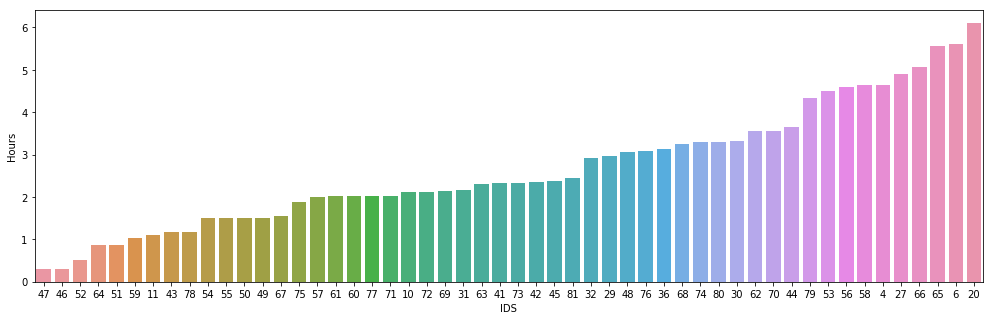

In [52]:
plt.figure(figsize = (17, 5))


ids = MotorTemp.groupby(['profile_id']).size().sort_values()
time = ids * .5 / 3600
sns.barplot(ids.index, time, order = ids.index)
plt.xlabel('IDS')
plt.ylabel('Hours');

In [56]:
MT20 = MotorTemp[MotorTemp['profile_id'] == 20]

In [59]:
MT20.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
96951,-1.908649,-1.079592,0.323421,-1.294816,-1.222432,-0.242639,1.029656,-0.245912,-2.484866,-1.811525,-2.055589,-1.997400,20
96952,-1.945673,-1.079477,0.318830,-1.293665,-1.222432,-0.240214,1.029574,-0.245876,-2.484019,-1.811462,-2.055858,-1.996591,20
96953,-1.946597,-1.079167,0.319580,-1.297363,-1.222431,-0.239513,1.029505,-0.245856,-2.484323,-1.811073,-2.056149,-1.995407,20
96954,-1.947213,-1.077655,0.321388,-1.295731,-1.222431,-0.238094,1.033528,-0.247344,-2.484937,-1.811298,-2.056193,-1.995178,20
96955,-1.952527,-1.075799,0.321497,-1.298276,-1.222431,-0.237660,1.032298,-0.246866,-2.485552,-1.810891,-2.056976,-1.994601,20


In [71]:
def plotCorrMatrix(df, graphWidth, name):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {name}', fontsize=15)
    plt.show()

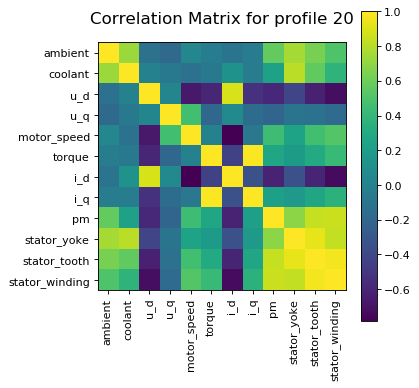

In [75]:
plotCorrMatrix(MT20, 5, 'profile 20')

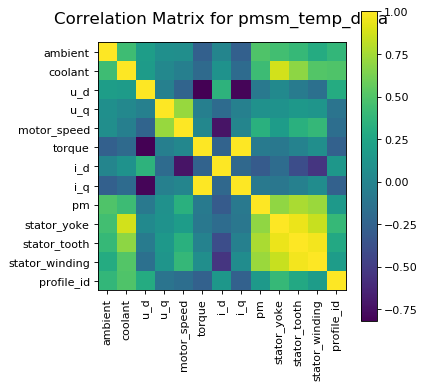

In [76]:
plotCorrMatrix(MotorTemp, 5, 'pmsm_temp_data')